# Task1:Data Preparation and Customer Analytics

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Transaction data**

In [ ]:
data=pd.read_excel('QVI_transaction_data.xlsx')

In [ ]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
data['PROD_QTY'].value_counts()

PROD_QTY
2      236039
1       27518
5         450
3         430
4         397
200         2
Name: count, dtype: int64

In [ ]:
data['DATE']=pd.to_datetime(data['DATE'],origin='1899-12-30',unit='D')

data['DATE'].head()


0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [ ]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
data['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

We can do some basic text analysis by summarising the individual words in the product name.

In [ ]:
# Split product names as well as remove all digits and special characters such as '&'
#import re
#PROD_word_only = data["PROD_NAME"].str.replace('([0-9]+[gG])','').str.replace('[^\w]', ' ').str.split()

# Calculate the frequency grouped by words and sort them
#PROD_freq = pd.value_counts([word for name in PROD_word_only for word in name]).sort_values(ascending=False)
#PROD_freq.head()

In [ ]:
#finding the most frequest words
import collections
freq=collections.Counter([j  for s in data["PROD_NAME"] for j in s.split()])

In [ ]:
#sorting in decreasing order of the frequency of words
fre=pd.DataFrame([freq.keys(),freq.values()],index=['Word','Frequency']).transpose().sort_values(by='Frequency',ascending=False)

In [ ]:
# removing useless words like '170g'
fre=fre[[ s[0] not in  ['0','1','2','3','4','5','6','7','8','9','&'] for s in fre['Word'] ]]
# most frequent words
fre.head()

,Word,Frequency
11,Chips,49770
16,Kettle,41288
8,Smiths,28860
29,Salt,27976
6,Cheese,27890


In [ ]:
#dropping salsa items
data.drop(data[[("Salsa" in s)  for s in data['PROD_NAME']]].index,inplace=True)

Handling missing values

In [ ]:
data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

<Axes: >

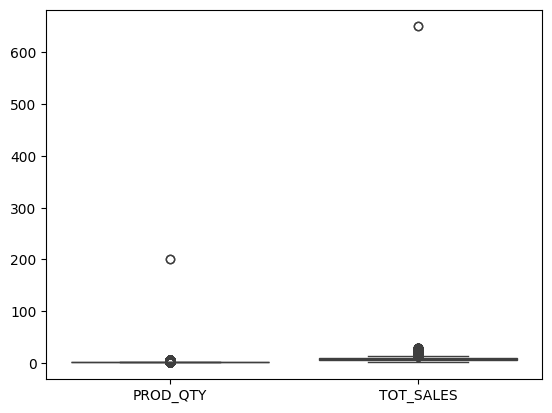

In [ ]:
sns.boxplot(data=data.loc[:,['PROD_QTY','TOT_SALES']])

There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. Let's investigate further the case where 200 packets of chips are bought in one transaction.

In [ ]:
#outlier
data.loc[data['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are 2 transactions where 200 packets of chips and these transactions are made by the same customer.

In [ ]:
#check whether that customer made other transaction
data.loc[data['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Hence the customer had done only 2 transactions, so we can drop those 2

In [ ]:
data=data.drop(index=[69762,69763])

Missing data handling

In [ ]:
ts_by_date=data.groupby(['DATE']).count()
ts_by_date.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660


In [ ]:
ts_by_date.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143
std,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536
min,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
25%,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
50%,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
75%,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000
max,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000


Here there are only 364 dates which means there is missing data on a particular date.

In [ ]:
data['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 246740, dtype: datetime64[ns]

In [ ]:
#missing date
#This creates a sequence of dates starting from July 1, 2018, and ending on June 30, 2019, with a frequency of one day
#missing_dates=list(set(pd.date_range('2018-07-01',end='2019-06-30',freq='D'))-set(ts_by_date.index))
#Performs a set difference operation between the set of dates generated by pd.date_range and the set of dates in ts_by_date.index. This operation finds the dates that are in the first set (all dates from July 1, 2018, to June 30, 2019) but not in the second set (dates from the index of ts_by_date).

In [ ]:
# Create a sequence of dates and join this the count of transactions by date
# Create a column of dates that includes every day from 1 Jul 2018 to30 Jun 2019
dates_seq = pd.date_range("2018-07-01","2019-06-30")

# Join it onto the data to fill in the missing day.
fill_dates = ts_by_date.reindex(dates_seq)
fill_dates

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-07-01,663.0,663.0,663.0,663.0,663.0,663.0,663.0
2018-07-02,650.0,650.0,650.0,650.0,650.0,650.0,650.0
2018-07-03,674.0,674.0,674.0,674.0,674.0,674.0,674.0
2018-07-04,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2018-07-05,660.0,660.0,660.0,660.0,660.0,660.0,660.0
...,...,...,...,...,...,...,...
2019-06-26,657.0,657.0,657.0,657.0,657.0,657.0,657.0
2019-06-27,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2019-06-28,673.0,673.0,673.0,673.0,673.0,673.0,673.0
2019-06-29,703.0,703.0,703.0,703.0,703.0,703.0,703.0


In [ ]:
# Find out the missing day
fill_dates.index.difference(data["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [ ]:
# It seems like 2018-12-25 is the missing day
fill_dates.loc['2018-12-25',:]

STORE_NBR        NaN
LYLTY_CARD_NBR   NaN
TXN_ID           NaN
PROD_NBR         NaN
PROD_NAME        NaN
PROD_QTY         NaN
TOT_SALES        NaN
Name: 2018-12-25 00:00:00, dtype: float64

Text(0, 0.5, 'Transaction')

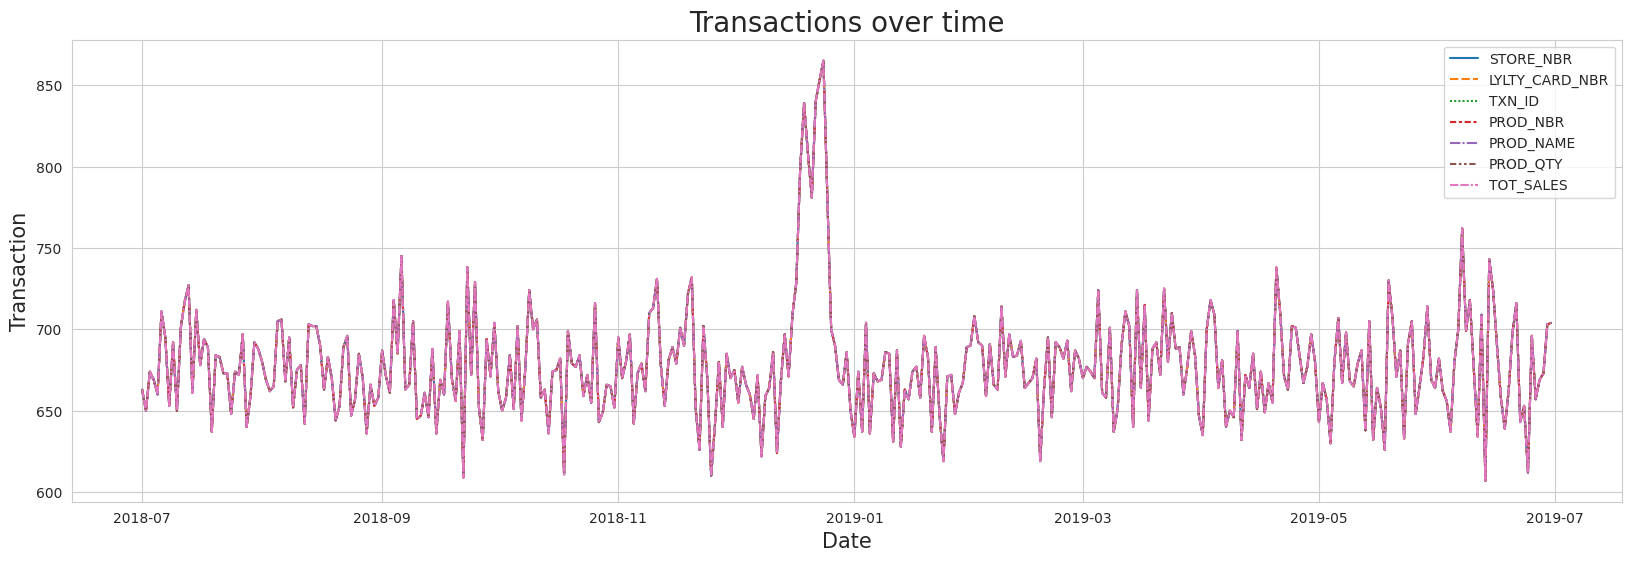

In [ ]:
# Plot transactions over time
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
plt.title("Transactions over time",fontsize=20)
sns.lineplot(data=fill_dates)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

Text(0, 0.5, 'Transaction')

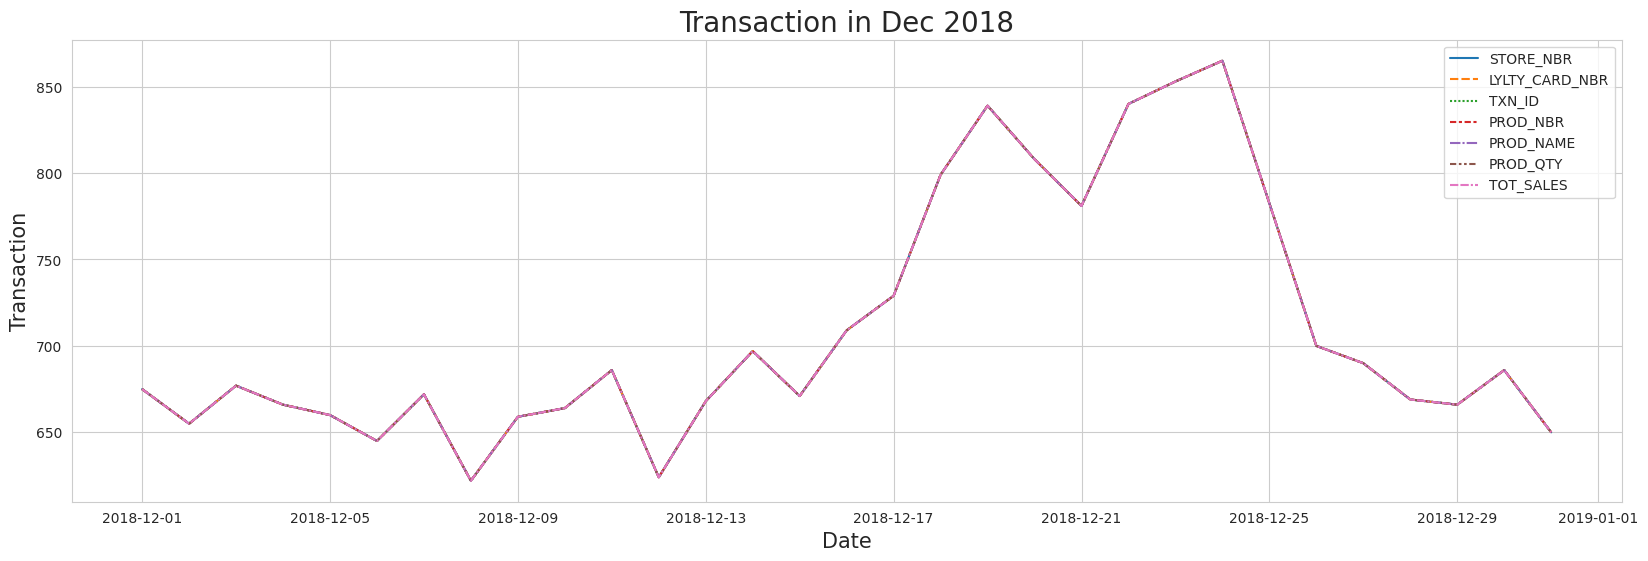

In [ ]:
# Zoom in to December and look at individual days
plt.figure(figsize=(20,6))
plt.title("Transaction in Dec 2018",fontsize=20)
sns.lineplot(data=fill_dates.loc['2018-12-01':'2018-12-31',:])
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

Here there is inclrease in sales till Christmas but zero sales on christmas day since the shops were closed. So it is not an outlier.

In [ ]:
#create pack_size from the prod_name (numbers present in each name indicates pack_size)
data['pack_size']=data['PROD_NAME'].str.extract('([0-9]+)').astype('float')
data['pack_size'].head()

0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: pack_size, dtype: float64

Text(0, 0.5, 'Number of Transactions')

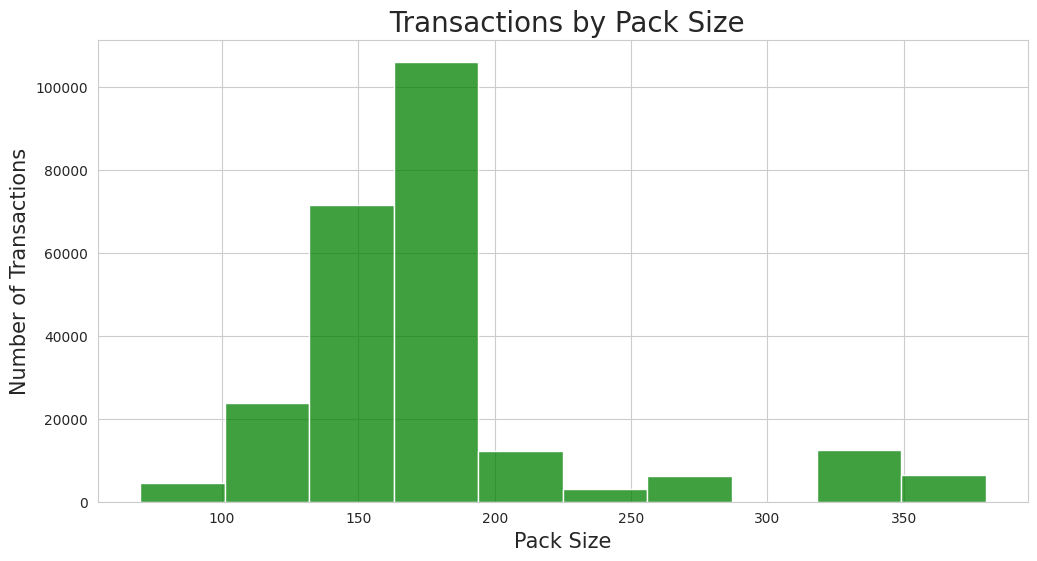

In [ ]:
# Plot a histogram showing the number of transactions by pack size
plt.figure(figsize=(12,6))
sns.histplot(x=data["pack_size"], bins=10, kde=False,color='green')
plt.title(" Transactions by Pack Size",fontsize=20)
plt.xlabel("Pack Size",fontsize=15)
plt.ylabel("Number of Transactions",fontsize=15)

Sizes are mostly concentrated between 150 and 200

In [ ]:
# Now to create brands, we can use the first word in PROD_NAME
data["BRAND"] = data["PROD_NAME"].str.split().str[0]
data["BRAND"].head()

0    Natural
1        CCs
2     Smiths
3     Smiths
4     Kettle
Name: BRAND, dtype: object

In [ ]:
data['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

Some of the brand names look like they are of the same brands <br>
*  Dorito    and Doritos<br>
*  Grain     and GrnWves    (not sure)<br>
*  Infuzions and Infzns<br>
*  NCC       and Natural    (not sure)<br>
*  Red       and RRD        (not sure)<br>
*  Smith     and Smiths<br>
*  Snbts     and Sunbites<br>
*  WW        and Woolworths<br>
Let's combine these together.

In [ ]:
#brands which are not sure

data["PROD_NAME"].loc[data["BRAND"]=="Grain"].head()

7      Grain Waves         Sweet Chilli 210g
9      Grain Waves Sour    Cream&Chives 210G
85     Grain Waves         Sweet Chilli 210g
181    Grain Waves         Sweet Chilli 210g
225    Grain Waves         Sweet Chilli 210g
Name: PROD_NAME, dtype: object

In [ ]:
data["PROD_NAME"].loc[data["BRAND"]=="Natural"].head()

0       Natural Chip        Compny SeaSalt175g
40      Natural ChipCo      Hony Soy Chckn175g
75     Natural Chip Co     Tmato Hrb&Spce 175g
214    Natural Chip Co     Tmato Hrb&Spce 175g
234     Natural ChipCo      Hony Soy Chckn175g
Name: PROD_NAME, dtype: object

In [ ]:
data["PROD_NAME"].loc[data["BRAND"]=="Red"].head()

28        Red Rock Deli Thai  Chilli&Lime 150g
34     Red Rock Deli Sp    Salt & Truffle 150G
212    Red Rock Deli Sp    Salt & Truffle 150G
297       Red Rock Deli Thai  Chilli&Lime 150g
331    Red Rock Deli Sp    Salt & Truffle 150G
Name: PROD_NAME, dtype: object

It seems like they are all the same brand

In [ ]:
# Clean brand names
def rename_brand(new,old):
    data["BRAND"].loc[data["BRAND"]==old] = new

rename_brand("Doritos","Dorito")
rename_brand("Grain Waves","Grain")
rename_brand("Grain Waves","GrnWves")
rename_brand("Infuzions","Infzns")
rename_brand("Natural Chip Co","NCC")
rename_brand("Natural Chip Co","Natural")
rename_brand("Red Rock Deli","Red")
rename_brand("Red Rock Deli","RRD")
rename_brand("Smiths","Smith")
rename_brand("Sunbites","Snbts")
rename_brand("Woolworths","WW")

# Check results
nbd = data["BRAND"].unique()
nbd.sort()
nbd

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'Grain Waves', 'Infuzions', 'Kettle', 'Natural Chip Co',
       'Pringles', 'Red Rock Deli', 'Smiths', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths'], dtype=object)

Text(0.5, 0, 'Transaction')

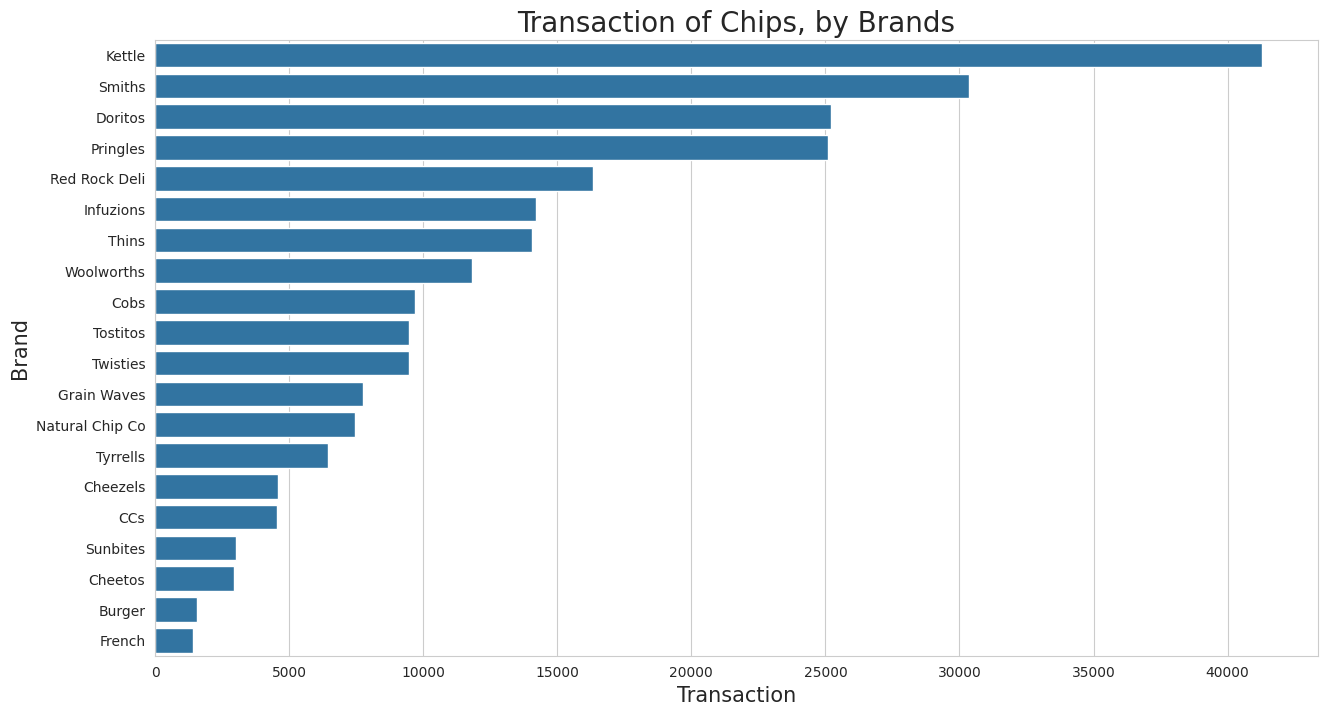

In [ ]:
# Plot a barchart to show the total sales of each brand
plt.figure(figsize=(15,8))
sns.barplot(x = data["BRAND"].value_counts(),y=data["BRAND"].value_counts().index)
plt.title("Transaction of Chips, by Brands",fontsize=20)
plt.ylabel("Brand",fontsize=15)
plt.xlabel("Transaction",fontsize=15)

Here the Kettle brand is more popular for chips

In [ ]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle


**Purchase Behaviour data**

In [ ]:
customer_data=pd.read_csv('QVI_purchase_behaviour.csv')

In [ ]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Let's see the distribution of Lifestage & Customer type by using pie chart

Text(0.5, 1.15, 'Distribution of Lifestage')

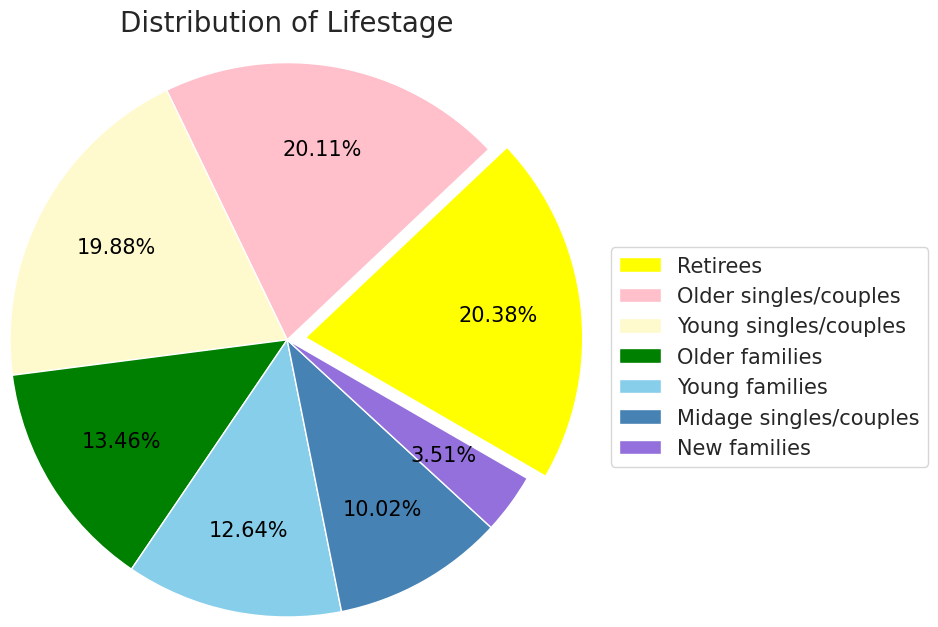

In [ ]:
# Plot a pie chart of LIFESTAGE
plt.figure(figsize=(6,6))
colors = ['yellow', 'pink', 'lemonchiffon', 'green', 'skyblue','steelblue','mediumpurple']
plt.pie(customer_data["LIFESTAGE"].value_counts(), colors=colors, explode=(0.1,0,0,0,0,0,0),textprops= {'fontsize':15,'color':'black'},
                                              radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-30)
plt.legend(customer_data["LIFESTAGE"].value_counts().index.str.capitalize(), fontsize=15,
                                                                        loc=2,
                                                                        bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of Lifestage", y=1.15, fontsize=20)

Text(0.5, 1.15, 'Distribution of Customer Type')

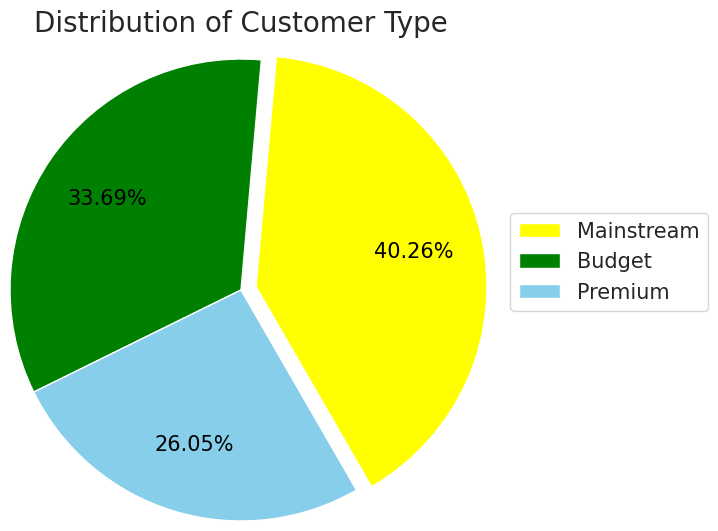

In [ ]:
# Plot a pie chart of PREMIUM_CUSTOMER
plt.figure(figsize=(5,5))
colors = ['yellow', 'green', 'skyblue']
plt.pie(customer_data["PREMIUM_CUSTOMER"].value_counts(), colors=colors,explode=(0.1,0,0),textprops= {'fontsize':15,'color':'black'},
                                                     radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-60)
plt.legend(customer_data["PREMIUM_CUSTOMER"].value_counts().index, fontsize=15,
                                                       loc=2, bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of Customer Type", y=1.15, fontsize=20)

There are 72637 customer sample in this table. Among these customers, the majority are retirees (20.38%), while the number of new families is the least, only 3.51%. For customer type, Mainstream customers account for the largest proportion，followed by Budget customers, and finally by the Premium customers.

**Merge the datasets**

In [ ]:
mergedata=pd.merge(data,customer_data,on='LYLTY_CARD_NBR')
mergedata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
mergedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   pack_size         246740 non-null  float64       
 9   BRAND             246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 22.6+ MB


In [ ]:
mergedata.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569600,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118


In [ ]:
mergedata.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
pack_size           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

**Save as csv file**

In [ ]:
mergedata.to_csv('mergedata.csv')

## **Data Analysis on customer segments**

Now that the data is ready for analysis, we can define some metrics of interest to the client:<br>
* Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is<br>
* How many customers are in each segment<br>
* How many chips are bought per customer by segment<br>
* What's the average chip price by customer segment<br>

* **Total sales**

Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe which customer segment contribute most to chip sales.

In [ ]:
#total sales
total_sales=pd.DataFrame(mergedata.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum())
total_sales

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

Text(0, 0.5, 'Total Sales')

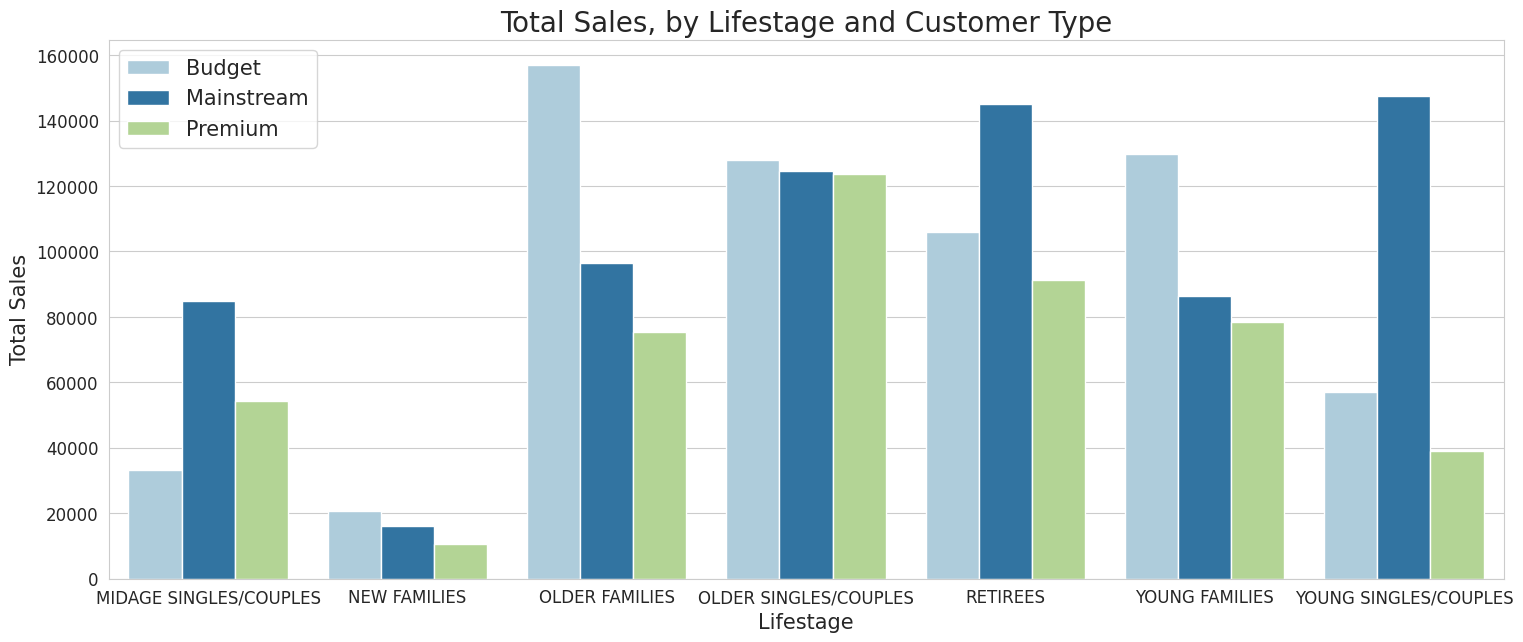

In [ ]:
# Plot to show total sales in each customer segement
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
ax=sns.barplot(x=total_sales.reset_index()["LIFESTAGE"], y=total_sales.reset_index()["TOT_SALES"],
            hue=total_sales.reset_index()["PREMIUM_CUSTOMER"],
            palette=sns.color_palette("Paired", 3))
plt.title("Total Sales, by Lifestage and Customer Type",fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Total Sales",fontsize=15)

Sales are coming mainly from <br>
* Budget - Older Families<br>
* Mainstream - Young Singles/Couples<br>
* Mainstream - Retirees<br>
Let's see if the higher sales are due to there being more customers who buy chips

* **Customer count by segment**

In [ ]:
#  Calculate the customer count in each segment
count = pd.DataFrame(customer_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).count())
count.columns=["CUSTOMER_COUNTS"]
count

CUSTOMER_COUNTS
LIFESTAGE              PREMIUM_CUSTOMER                 
MIDAGE SINGLES/COUPLES Budget                       1504
                       Mainstream                   3340
                       Premium                      2431
NEW FAMILIES           Budget                       1112
                       Mainstream                    849
                       Premium                       588
OLDER FAMILIES         Budget                       4675
                       Mainstream                   2831
                       Premium                      2274
OLDER SINGLES/COUPLES  Budget                       4929
                       Mainstream                   4930
                       Premium                      4750
RETIREES               Budget                       4454
                       Mainstream                   6479
                       Premium                      3872
YOUNG FAMILIES         Budget                       4017
                       Mainstream                   2728
                       Premium                      2433
YOUNG SINGLES/COUPLES  Budget                       3779
                       Mainstream                   8088
                       Premium                      2574

Text(0, 0.5, 'Count')

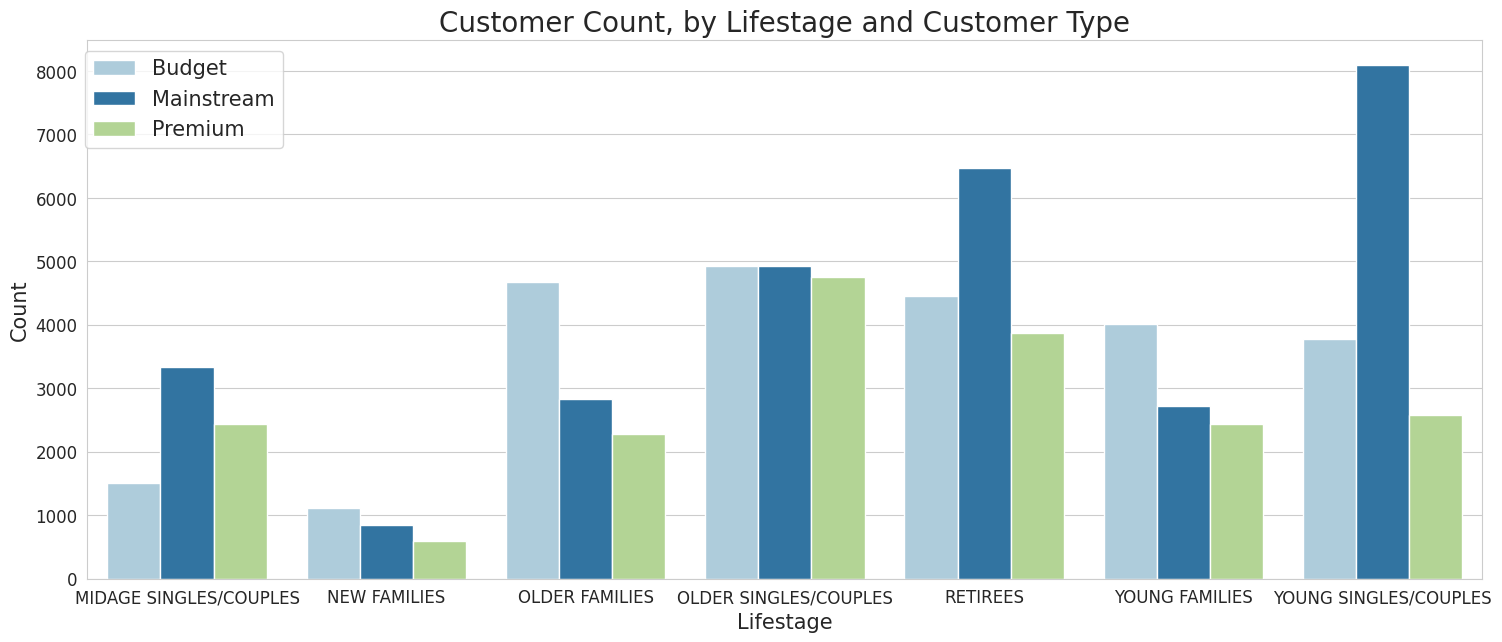

In [ ]:
# Plot to show customer count in each segment
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=count.reset_index()["LIFESTAGE"], y=count.reset_index()["CUSTOMER_COUNTS"],
            hue=count.reset_index()["PREMIUM_CUSTOMER"],
            palette=sns.color_palette("Paired", 3))
plt.title("Customer Count, by Lifestage and Customer Type",fontsize=20)
plt.legend(loc=0, fontsize=15, bbox_to_anchor=(0.14,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Count",fontsize=15)

We can clearly find out that there are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips.

* **Average Sales quantity**

In [ ]:
# Calculate the average number of units per customer by those two dimensions
merge_q = pd.merge(total_sales,count,on=["LIFESTAGE","PREMIUM_CUSTOMER"])
merge_q['SALES_QTY'] = mergedata.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["PROD_QTY"].sum()
merge_q['AVG_SALES_QTY'] = (merge_q["SALES_QTY"]/merge_q["CUSTOMER_COUNTS"])
merge_q

TOT_SALES  CUSTOMER_COUNTS  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             33345.70             1504   
                       Mainstream         84734.25             3340   
                       Premium            54443.85             2431   
NEW FAMILIES           Budget             20607.45             1112   
                       Mainstream         15979.70              849   
                       Premium            10760.80              588   
OLDER FAMILIES         Budget            156863.75             4675   
                       Mainstream         96413.55             2831   
                       Premium            75242.60             2274   
OLDER SINGLES/COUPLES  Budget            127833.60             4929   
                       Mainstream        124648.50             4930   
                       Premium           123537.55             4750   
RETIREES               Budget            105916.30             4454   
                       Mainstream        145168.95             6479   
                       Premium            91296.65             3872   
YOUNG FAMILIES         Budget            129717.95             4017   
                       Mainstream         86338.25             2728   
                       Premium            78571.70             2433   
YOUNG SINGLES/COUPLES  Budget             57122.10             3779   
                       Mainstream        147582.20             8088   
                       Premium            39052.30             2574   

                                         SALES_QTY  AVG_SALES_QTY  
LIFESTAGE              PREMIUM_CUSTOMER                            
MIDAGE SINGLES/COUPLES Budget                 8883       5.906250  
                       Mainstream            21213       6.351198  
                       Premium               14400       5.923488  
NEW FAMILIES           Budget                 5241       4.713129  
                       Mainstream             4060       4.782097  
                       Premium                2769       4.709184  
OLDER FAMILIES         Budget                41853       8.952513  
                       Mainstream            25804       9.114800  
                       Premium               20239       8.900176  
OLDER SINGLES/COUPLES  Budget                32883       6.671333  
                       Mainstream            32607       6.613996  
                       Premium               31695       6.672632  
RETIREES               Budget                26932       6.046700  
                       Mainstream            37677       5.815249  
                       Premium               23266       6.008781  
YOUNG FAMILIES         Budget                34482       8.584018  
                       Mainstream            23194       8.502199  
                       Premium               20901       8.590629  
YOUNG SINGLES/COUPLES  Budget                15500       4.101614  
                       Mainstream            36225       4.478858  
                       Premium               10575       4.108392

Text(0, 0.5, 'Average Sales Quantity')

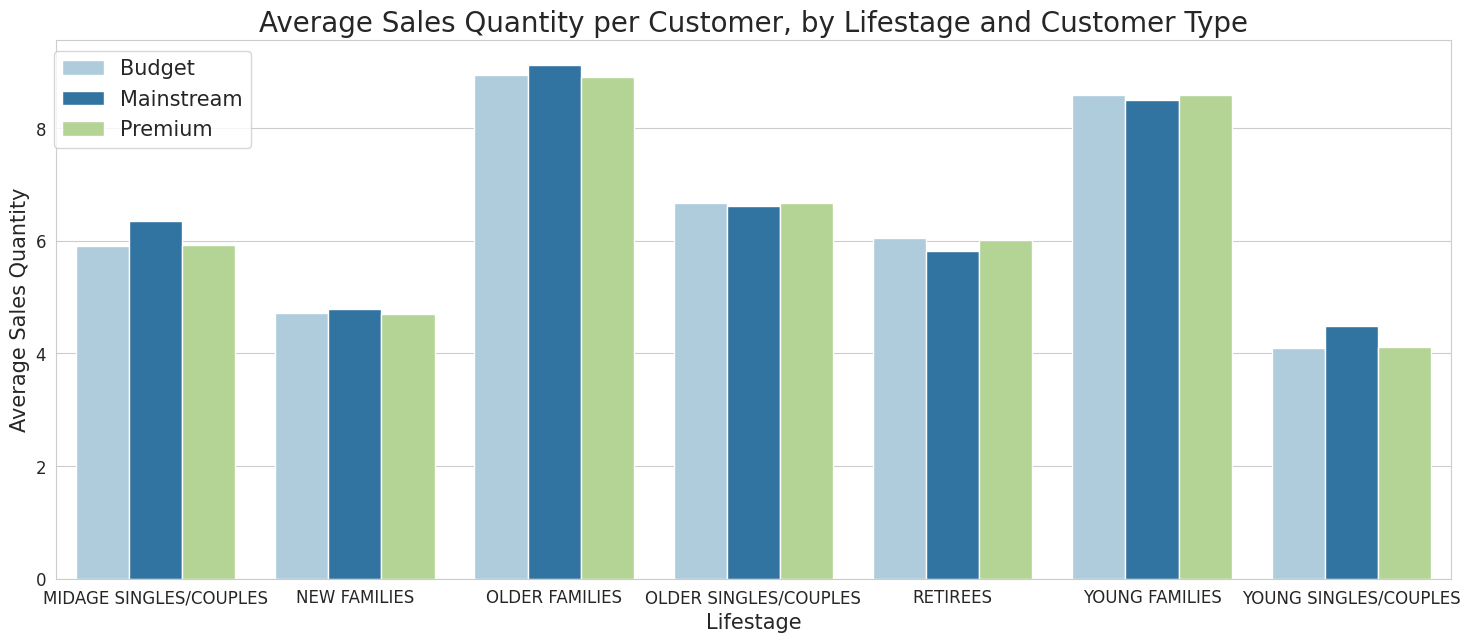

In [ ]:
# Plot the average number of units per customer by those two dimensions
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=merge_q.reset_index()["LIFESTAGE"], y=merge_q.reset_index()["AVG_SALES_QTY"],
            hue=merge_q.reset_index()["PREMIUM_CUSTOMER"],
            palette=sns.color_palette("Paired", 3))
plt.title("Average Sales Quantity per Customer, by Lifestage and Customer Type",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(0.14,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average Sales Quantity",fontsize=15)

Older families and young families in general buy more chips per customer.

* **Average Sales price**

Let's also investigate the average price per unit chips bought for each customer segment.

In [ ]:
# Calculate the average price per unit sold (average sale price) by those two customer dimensions
merge_q['AVG_SALES_PRICE'] = (merge_q["TOT_SALES"]/merge_q["SALES_QTY"])
merge_q

TOT_SALES  CUSTOMER_COUNTS  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             33345.70             1504   
                       Mainstream         84734.25             3340   
                       Premium            54443.85             2431   
NEW FAMILIES           Budget             20607.45             1112   
                       Mainstream         15979.70              849   
                       Premium            10760.80              588   
OLDER FAMILIES         Budget            156863.75             4675   
                       Mainstream         96413.55             2831   
                       Premium            75242.60             2274   
OLDER SINGLES/COUPLES  Budget            127833.60             4929   
                       Mainstream        124648.50             4930   
                       Premium           123537.55             4750   
RETIREES               Budget            105916.30             4454   
                       Mainstream        145168.95             6479   
                       Premium            91296.65             3872   
YOUNG FAMILIES         Budget            129717.95             4017   
                       Mainstream         86338.25             2728   
                       Premium            78571.70             2433   
YOUNG SINGLES/COUPLES  Budget             57122.10             3779   
                       Mainstream        147582.20             8088   
                       Premium            39052.30             2574   

                                         SALES_QTY  AVG_SALES_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                             
MIDAGE SINGLES/COUPLES Budget                 8883       5.906250   
                       Mainstream            21213       6.351198   
                       Premium               14400       5.923488   
NEW FAMILIES           Budget                 5241       4.713129   
                       Mainstream             4060       4.782097   
                       Premium                2769       4.709184   
OLDER FAMILIES         Budget                41853       8.952513   
                       Mainstream            25804       9.114800   
                       Premium               20239       8.900176   
OLDER SINGLES/COUPLES  Budget                32883       6.671333   
                       Mainstream            32607       6.613996   
                       Premium               31695       6.672632   
RETIREES               Budget                26932       6.046700   
                       Mainstream            37677       5.815249   
                       Premium               23266       6.008781   
YOUNG FAMILIES         Budget                34482       8.584018   
                       Mainstream            23194       8.502199   
                       Premium               20901       8.590629   
YOUNG SINGLES/COUPLES  Budget                15500       4.101614   
                       Mainstream            36225       4.478858   
                       Premium               10575       4.108392   

                                         AVG_SALES_PRICE  
LIFESTAGE              PREMIUM_CUSTOMER                   
MIDAGE SINGLES/COUPLES Budget                   3.753878  
                       Mainstream               3.994449  
                       Premium                  3.780823  
NEW FAMILIES           Budget                   3.931969  
                       Mainstream               3.935887  
                       Premium                  3.886168  
OLDER FAMILIES         Budget                   3.747969  
                       Mainstream               3.736380  
                       Premium                  3.717703  
OLDER SINGLES/COUPLES  Budget                   3.887529  
                       Mainstream               3.822753  
                       Premium                  3.89

Text(0, 0.5, 'Average Sales Price')

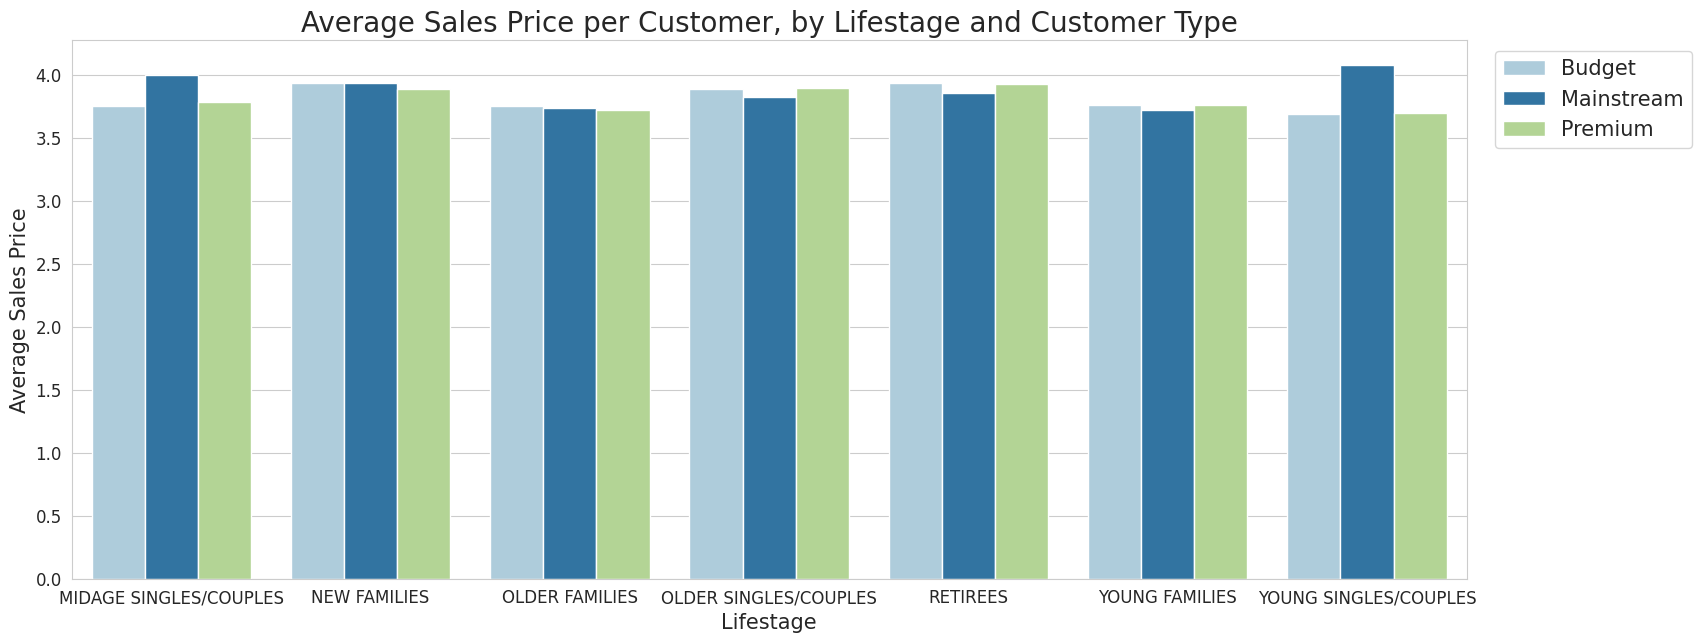

In [ ]:
# Plot the average number of units per customer by those two dimensions
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=merge_q.reset_index()["LIFESTAGE"], y=merge_q.reset_index()["AVG_SALES_PRICE"],
            hue=merge_q.reset_index()["PREMIUM_CUSTOMER"],
            palette=sns.color_palette("Paired", 3))
plt.title("Average Sales Price per Customer, by Lifestage and Customer Type",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.02,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average Sales Price",fontsize=15)

Mainstream midage and young singles/couples are more willing to pay more per packet of chips compared to their budget and premium counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [ ]:
from scipy import stats
# Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples
new_merge=merge_q.reset_index()
mainstream = new_merge.loc[new_merge["PREMIUM_CUSTOMER"]=="Mainstream"]
others = new_merge.loc[(new_merge["PREMIUM_CUSTOMER"]=="Premium")|(new_merge["PREMIUM_CUSTOMER"]=="Budget")]
main_mid_young = mainstream["AVG_SALES_PRICE"][(new_merge["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")|(new_merge["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]
others_mid_young = others["AVG_SALES_PRICE"][(new_merge["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")|(new_merge["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]

In [ ]:
# Homogeneity of variance test
stats.levene(main_mid_young,others_mid_young)

LeveneResult(statistic=0.00490158871698384, pvalue=0.9475450406225323)

The Levene test is a statistical test used to assess the equality of variances across groups.

* If the p-value obtained from the Levene test is less than a chosen significance level (e.g., 0.05), you would reject the null hypothesis. This would suggest that there is evidence to indicate that the variances of the groups are not equal.
* If the p-value is greater than the chosen significance level, you would fail to reject the null hypothesis. This would suggest that there is not enough evidence to conclude that the variances of the groups are different, indicating homogeneity of variances.

In [106]:
stats.ttest_ind(main_mid_young,others_mid_young, equal_var=False)

TtestResult(statistic=6.635796901874541, pvalue=0.031128004009301317, df=1.7352652705729508)

The t-test results in a p-value of 0.03 (< 0.05) show the statistical significant (95% confidence), i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

We have found quite a few interesting insights that we can dive deeper into.<br>
We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips. Besides, let's also find out if our target segment tends to buy larger packs of chips.

In [108]:
# Brands and package sizes of 'Mainstream - young singles/couples' Segment and other segments
bp = pd.DataFrame(mergedata.loc[:,["LYLTY_CARD_NBR","LIFESTAGE","PREMIUM_CUSTOMER","BRAND","pack_size","PROD_QTY"]])
ms = bp[(bp["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")&(bp["PREMIUM_CUSTOMER"]=="Mainstream")]
ms.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,pack_size,PROD_QTY
221345,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,150.0,1
221346,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,330.0,1
221347,1020,YOUNG SINGLES/COUPLES,Mainstream,Grain Waves,180.0,1
221348,1163,YOUNG SINGLES/COUPLES,Mainstream,Kettle,175.0,1
221349,1163,YOUNG SINGLES/COUPLES,Mainstream,Natural Chip Co,175.0,1


In [109]:
# Most popular brands
ms["BRAND"].value_counts().head(3)

BRAND
Kettle      3844
Doritos     2379
Pringles    2315
Name: count, dtype: int64

In [110]:
# Most popular package sizes
ms["pack_size"].value_counts().head(3)

pack_size
175.0    4997
150.0    3080
134.0    2315
Name: count, dtype: int64

The best-selling brands in 'Mainstream - young singles/couples' Segment are Kettle, Doritos, and Pringles.<br>
For package sizes, 175g, 150g, and 134g are the most popular choices.

**Apriori Analysis**

In [111]:
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth

In [112]:
# Apriori analysis on brands
basket_b=ms.groupby(['LYLTY_CARD_NBR','BRAND'])['PROD_QTY'].sum().unstack().fillna(0)
basket_b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain Waves,Infuzions,Kettle,Natural Chip Co,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1060,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2330041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2330321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [113]:
# Turn the shopping quantity into a 0/1 variable, i.e., whether to buy the item or not
def reducer(x):
    if x <= 0:
        return 0
    else:
        return 1
basket_b=basket_b.applymap(reducer)
basket_b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain Waves,Infuzions,Kettle,Natural Chip Co,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1010,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1060,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2330041,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2330321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [114]:
# Frequent itemsets of our target segment
frequent_itemsets = apriori(basket_b, min_support=0.04, use_colnames=True)
frequent_itemsets.sort_values(by="support",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
5,0.387142,(Kettle)
2,0.260326,(Doritos)
7,0.256158,(Pringles)
9,0.202476,(Smiths)
4,0.143110,(Infuzions)
10,0.136036,(Thins)
12,0.107364,(Twisties)
11,0.105848,(Tostitos)
1,0.103827,(Cobs)
8,0.093975,(Red Rock Deli)


In [116]:
# Output of apriori analysis
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by=["confidence","support"],ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Infuzions),(Pringles),0.143110,0.256158,0.041051,0.286849,1.119815,0.004392,1.043036,0.124864
0,(Pringles),(Infuzions),0.256158,0.143110,0.041051,0.160256,1.119815,0.004392,1.020419,0.143841


According to the Frequent itemsets, we clearly see that customers in our target segement(Mainstream - young singles/couples) prefer Kettle more than other brands.<br>
We can also prove an association among chips of different brands from the output of apriori analysis. More specifically, since lift > 1, which means that buying chips of one brand will boost sales of another brand chips, we can put chips of Infuzions and Pringles together for sale.

In [117]:
# Apriori analysis on package size
basket_p=ms.groupby(['LYLTY_CARD_NBR','pack_size'])['PROD_QTY'].sum().unstack().fillna(0)
basket_p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



pack_size,70.0,90.0,110.0,125.0,134.0,135.0,150.0,160.0,165.0,170.0,175.0,180.0,190.0,200.0,210.0,220.0,250.0,270.0,330.0,380.0
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2330041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2330321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [118]:
# Turn the shopping quantity into a 0/1 variable, i.e., whether to buy the item or not
def reducer(x):
    if x <= 0:
        return 0
    else:
        return 1
basket_p=basket_p.applymap(reducer)
basket_p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



pack_size,70.0,90.0,110.0,125.0,134.0,135.0,150.0,160.0,165.0,170.0,175.0,180.0,190.0,200.0,210.0,220.0,250.0,270.0,330.0,380.0
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1010,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1018,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1060,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2330041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2330321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [119]:
# Frequent itemsets of our target segment
frequent_itemsets_p = apriori(basket_p, min_support=0.06, use_colnames=True)
frequent_itemsets_p.sort_values(by="support",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
5,0.458254,(175.0)
2,0.313755,(150.0)
1,0.256158,(134.0)
0,0.224454,(110.0)
4,0.176835,(170.0)
8,0.139320,(330.0)
14,0.137931,"(150.0, 175.0)"
3,0.127700,(165.0)
13,0.111153,"(134.0, 175.0)"
11,0.094480,"(110.0, 175.0)"


In [121]:
# Output of apriori analysis
association_rules(frequent_itemsets_p, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(165.0),(175.0),0.127700,0.458254,0.060124,0.470821,1.027423,0.001605,1.023747,0.030598
1,(175.0),(165.0),0.458254,0.127700,0.060124,0.131202,1.027423,0.001605,1.004031,0.049268


Our target segement(Mainstream - young singles/couples) prefer chips with 175g package size, which is a regular size, more than others. Similarly, there is an association among chips of different size, which recommands us to put chips of 175g and 165g together for sales.